#### Import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
df = pd.read_csv("h1b_disclosure_data_2015_2019.csv", encoding = 'latin')

df.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",PA,2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA"
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER*",15-1799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,PA,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA"
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,IL,2015,ILLINOIS,"CHICAGO, ILLINOIS"
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,NY,2015,NEW YORK,"AUBURN, NEW YORK"
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,15-1142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,NY,2015,NEW YORK,"BETHPAGE, NEW YORK"


In [5]:
# check for NA values
df.isna().sum()

CASE_NUMBER             0
CASE_STATUS             0
EMPLOYER_NAME          21
SOC_NAME                6
SOC_CODE                4
JOB_TITLE               5
FULL_TIME_POSITION      1
PREVAILING_WAGE         4
WORKSITE_CITY          28
WORKSITE_STATE_ABB      0
YEAR                    0
WORKSITE_STATE_FULL     0
WORKSITE                0
dtype: int64

In [6]:
# check the target column
df['CASE_STATUS'].value_counts()

CASE_STATUS
CERTIFIED              765099
CERTIFIED-WITHDRAWN     53049
WITHDRAWN               27297
DENIED                  11771
Name: count, dtype: int64

In [7]:
# remove the records from target column which contains 'WITHDRAWN' and 'CERTIFIED-WITHDRAWN'
df = df[~df['CASE_STATUS'].str.contains('WITHDRAWN',case = False)]
df = df[~df['CASE_STATUS'].str.contains('CERTIFIED-WITHDRAWN',case = False)]

In [8]:
df['CASE_STATUS'].value_counts()

CASE_STATUS
CERTIFIED    765099
DENIED        11771
Name: count, dtype: int64

In [9]:
# drop records containing NA values
df = df.dropna()

In [10]:
#Rename colunmns 'WORKSITE_CITY' to 'CITY','WORKSITE_STATE_FULL'to'STATE'
columns = df.columns
df = df.rename(columns = {'WORKSITE_CITY':'CITY','WORKSITE_STATE_FULL':'STATE'})

In [11]:
# Drop columns which are not required
df=df.drop(['WORKSITE_STATE_ABB'], axis=1)

In [12]:
# Convert city names into uppercase
df['CITY'] = df['CITY'].str.upper()

In [13]:
df.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,CITY,YEAR,STATE,WORKSITE
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA"
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,2015,ILLINOIS,"CHICAGO, ILLINOIS"
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,2015,NEW YORK,"AUBURN, NEW YORK"
5,I-200-10028-460244,CERTIFIED,"SUNERA TECHNOLOGIES, INC",COMPUTER PROGRAMMERS,15-1131,PROGRAMMER ANALYST,Y,61901.0,TROY,2015,MICHIGAN,"TROY, MICHIGAN"
7,I-200-10053-213884,CERTIFIED,LIANG LLC,FINANCIAL ANALYSTS,13-2051,FINANCIAL ANALYST,N,49108.8,CARBONDALE,2015,ILLINOIS,"CARBONDALE, ILLINOIS"


In [14]:
# Remove characters other than alphabets from city
import re
df['CITY'] = (
    df['CITY']
    .astype(str)
    .apply(lambda x: re.sub('[^A-Za-z ]', '', x))  # allow space
    .str.upper()
)

In [ ]:
# df.duplicated().sum()

np.int64(5)

In [16]:
# Remove leading space
df['CITY'] = df['CITY'].astype(str).str.lstrip()

In [17]:
# Normalize formatting
df['CITY'] = df['CITY'].astype(str).str.upper().str.strip()
df['STATE'] = df['STATE'].astype(str).str.upper().str.strip()

In [18]:
# Apply rule
mask = df['CITY'].str.contains("NEW YORK") & (df['STATE'] == "NEW YORK")
df.loc[mask, 'CITY'] = "NEW YORK"

In [ ]:
# df.duplicated().sum()

np.int64(5)

In [20]:
# function to count cities
def get_city_counts(dataframe, column_name, search_string):

    # create the mask using search string
    mask = dataframe[column_name].str.contains(search_string, case=False, na=False)

    # filter the specific column using .loc
    filtered_series = dataframe.loc[mask, column_name]

    # return the value count
    return filtered_series.value_counts()

In [21]:
# list containing city names
search_list = ['MANHATTAN','CHICAGO','CINCINNATI','BRONX','HARTFORD','LONG ISLAND CITY','BROOKLYN','YORKTOWN HEIGHTS']
# iterate through each city and call the function
for city in search_list:
    print(f"\n----------Results for city: {city}-----")

    #call the function
    counts = get_city_counts(df,'CITY',city)
    print(counts)


----------Results for city: MANHATTAN-----
CITY
MANHATTAN                 151
EAST MIDTOWN MANHATTAN      1
NYC DOWNTOWN MANHATTAN      1
LOWER MANHATTAN             1
Name: count, dtype: int64

----------Results for city: CHICAGO-----
CITY
CHICAGO                  55035
NORTH CHICAGO              992
EAST CHICAGO               198
WEST CHICAGO                70
CHICAGO HEIGHTS             33
N CHICAGO                   27
CHICAGO RIDGE               21
CHICAGO IL                  10
CHICAGO IL MSA               2
NCHICAGO                     2
SOUTH CHICAGO HEIGHTS        2
METRO CHICAGO                2
DOWNTOWN CHICAGO             1
NORTH CHICAGO IL             1
E CHICAGO                    1
CHICAGONBSP                  1
CHICAGOL                     1
CHICAGO DWNTN                1
NBSPCHICAGO                  1
RANDOLPH ST CHICAGO          1
STCHICAGO                    1
NORTN CHICAGO                1
Name: count, dtype: int64

----------Results for city: CINCINNATI-----
CITY


In [22]:
# function to standardize city names
def standardize_cities(dframe, column_name, city_list):

 for city_name in city_list:
    mask = dframe[column_name].str.contains(city_name, case=False, na=False)
    dframe.loc[mask, column_name] = city_name

 return dframe

In [23]:
column_to_clean = 'CITY'

city_names = ['MANHATTAN','CHICAGO','CINCINNATI','BRONX','HARTFORD','LONG ISLAND CITY','BROOKLYN','YORKTOWN HEIGHTS']
for col in city_names:
# Correct usage:
# Pass the COLUMN NAME first, then the list of standard names
  df_cleaned = standardize_cities(df, column_to_clean, city_names)

In [24]:
search_list = ['MANHATTAN','CHICAGO','CINCINNATI','BRONX','HARTFORD','LONG ISLAND CITY','BROOKLYN']

# iterate through each city and call the function
for city in search_list:
    print(f"\n----------Results for city: {city}-----")

    #call the function
    counts = get_city_counts(df,'CITY',city)
    print(counts)


----------Results for city: MANHATTAN-----
CITY
MANHATTAN    154
Name: count, dtype: int64

----------Results for city: CHICAGO-----
CITY
CHICAGO    56404
Name: count, dtype: int64

----------Results for city: CINCINNATI-----
CITY
CINCINNATI    9347
Name: count, dtype: int64

----------Results for city: BRONX-----
CITY
BRONX    3627
Name: count, dtype: int64

----------Results for city: HARTFORD-----
CITY
HARTFORD    247
Name: count, dtype: int64

----------Results for city: LONG ISLAND CITY-----
CITY
LONG ISLAND CITY    3815
Name: count, dtype: int64

----------Results for city: BROOKLYN-----
CITY
BROOKLYN    11130
Name: count, dtype: int64


In [25]:
df['CITY'].value_counts()

CITY
NEW YORK         175540
CHICAGO           56404
PHILADELPHIA      25680
COLUMBUS          22491
PITTSBURGH        15719
                  ...  
CHESANING             1
GODFREY RD            1
SHENANDOAH            1
GAGES LAKE            1
PHROPHETSTOWN         1
Name: count, Length: 5101, dtype: int64

In [26]:
df.duplicated().sum()

np.int64(5)

In [27]:
# Clean spaces first
df['CITY'] = df['CITY'].astype(str).str.strip().str.upper()

# Remove all rows where CITY length is 1
df = df[df['CITY'].str.len() > 1]

In [28]:
df.shape

(776804, 12)

In [ ]:
# Normalize
df["CITY"] = df["CITY"].astype(str).str.upper().str.strip()

# Load valid US cities (already generated)
valid_us = pd.read_csv("/others/uscities.csv")["city"].astype(str).str.upper().str.strip()

# Keep only rows where CITY is valid
df = df[df["CITY"].isin(valid_us)].reset_index(drop=True)

C:\Users\Shree\AppData\Local\Temp\ipykernel_15160\3068726990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CITY"] = df["CITY"].astype(str).str.upper().str.strip()


In [30]:
df.shape

(743751, 12)

In [31]:
df.duplicated().sum()

np.int64(5)

In [32]:
# drop the duplicate values
df = df.drop_duplicates()

In [33]:
columns = df.columns
for col in columns:
    print(f"------{col}------")
    print(df[col].value_counts())
    print()

------CASE_NUMBER------
CASE_NUMBER
I-200-15054-406343    3
I-200-15049-306518    2
I-200-15048-915947    2
I-200-09364-425868    1
I-200-10028-460244    1
                     ..
I-203-18306-276307    1
I-203-18309-281131    1
I-203-18311-116975    1
I-203-18313-952669    1
I-200-09342-274341    1
Name: count, Length: 743742, dtype: int64

------CASE_STATUS------
CASE_STATUS
CERTIFIED    732573
DENIED        11173
Name: count, dtype: int64

------EMPLOYER_NAME------
EMPLOYER_NAME
INFOSYS LIMITED                                 23172
TATA CONSULTANCY SERVICES LIMITED               22225
DELOITTE CONSULTING LLP                         18168
CAPGEMINI AMERICA INC                           14673
ERNST & YOUNG U.S. LLP                          11050
                                                ...  
GERTEN GREENHOUSES &AMP; GARDEN CENTER, INC.        1
NATURIPE FARMS IMPORTS INC                          1
PONTCHARTRAIN DETROIT HOTEL LLC                     1
JB BRADY INC                

In [34]:
df['STATE'].value_counts()

STATE
NEW YORK        244268
ILLINOIS        144989
PENNSYLVANIA     96006
MICHIGAN         87315
OHIO             70684
MINNESOTA        41405
WISCONSIN        30412
INDIANA          28667
Name: count, dtype: int64

In [35]:
df.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,CITY,YEAR,STATE,WORKSITE
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,NORTH WALES,2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA"
1,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,2015,ILLINOIS,"CHICAGO, ILLINOIS"
2,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,2015,NEW YORK,"AUBURN, NEW YORK"
3,I-200-10028-460244,CERTIFIED,"SUNERA TECHNOLOGIES, INC",COMPUTER PROGRAMMERS,15-1131,PROGRAMMER ANALYST,Y,61901.0,TROY,2015,MICHIGAN,"TROY, MICHIGAN"
4,I-200-10053-213884,CERTIFIED,LIANG LLC,FINANCIAL ANALYSTS,13-2051,FINANCIAL ANALYST,N,49108.8,CARBONDALE,2015,ILLINOIS,"CARBONDALE, ILLINOIS"


In [ ]:
# Drop irrelavant and no required columns
col_todrop = ['CASE_NUMBER','WORKSITE']
df.drop(col_todrop, axis=1, inplace=True)

In [38]:
df['CASE_STATUS'].value_counts()

CASE_STATUS
CERTIFIED    732573
DENIED        11173
Name: count, dtype: int64

In [39]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,CITY,YEAR,STATE
0,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,NORTH WALES,2015,PENNSYLVANIA
1,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,2015,ILLINOIS
2,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,2015,NEW YORK
3,CERTIFIED,"SUNERA TECHNOLOGIES, INC",COMPUTER PROGRAMMERS,15-1131,PROGRAMMER ANALYST,Y,61901.0,TROY,2015,MICHIGAN
4,CERTIFIED,LIANG LLC,FINANCIAL ANALYSTS,13-2051,FINANCIAL ANALYST,N,49108.8,CARBONDALE,2015,ILLINOIS


In [40]:
df.duplicated().sum()

np.int64(250343)

In [41]:
df['EMPLOYER_NAME'].value_counts()

EMPLOYER_NAME
INFOSYS LIMITED                                 23172
TATA CONSULTANCY SERVICES LIMITED               22225
DELOITTE CONSULTING LLP                         18168
CAPGEMINI AMERICA INC                           14673
ERNST & YOUNG U.S. LLP                          11050
                                                ...  
GERTEN GREENHOUSES &AMP; GARDEN CENTER, INC.        1
NATURIPE FARMS IMPORTS INC                          1
PONTCHARTRAIN DETROIT HOTEL LLC                     1
JB BRADY INC                                        1
PRO ONE MANAGEMENT, LLC                             1
Name: count, Length: 65716, dtype: int64

In [42]:
df['EMPLOYER_NAME'].nunique()


65716

In [43]:
unique_vals = df['EMPLOYER_NAME'].unique()

### Employer Name Preprocessing
- standardizes employer names by removing formatting inconsistencies and making all names uniform.
Cleaning helps reduce duplicate variations of the same employer and improves data quality for analysis.

In [44]:
# Make a clean copy of employer names
df['EMPLOYER_CLEAN'] = df['EMPLOYER_NAME'].astype(str)

# 1. Convert to uppercase
df['EMPLOYER_CLEAN'] = df['EMPLOYER_CLEAN'].str.upper()

In [45]:
# 2. Remove starting & ending quotes
df['EMPLOYER_CLEAN'] = df['EMPLOYER_CLEAN'].str.replace('"', '', regex=False)

# 3. Remove punctuation: commas, periods, plus, ampersand formatting
df['EMPLOYER_CLEAN'] = df['EMPLOYER_CLEAN'].str.replace(r"[.,+]", "", regex=True)

In [46]:
# 4. Replace dash around words
df['EMPLOYER_CLEAN'] = df['EMPLOYER_CLEAN'].str.replace(r"\s*-\s*", " ", regex=True)

# 5. Company suffixes to remove
suffixes = [
    ' INCORPORATED', ' INC', ' LLC', ' LLP', ' LP', ' LTD', ' LIMITED',
    ' CORPORATION', ' CORP', ' COMPANY', ' CO', ' PC', ' P C', ' P.C',
    ' P C.', ' NA', ' N A', ' N.A', ' N A.'
]

# Remove suffixes
for suf in suffixes:
    df['EMPLOYER_CLEAN'] = df['EMPLOYER_CLEAN'].str.replace(rf"\b{suf}\b", "", regex=True)


In [47]:
# 6. Remove extra whitespace
df['EMPLOYER_CLEAN'] = df['EMPLOYER_CLEAN'].str.replace(r"\s+", " ", regex=True)
df['EMPLOYER_CLEAN'] = df['EMPLOYER_CLEAN'].str.strip()

# Show sample results
df[['EMPLOYER_NAME', 'EMPLOYER_CLEAN']].head(20)


,EMPLOYER_NAME,EMPLOYER_CLEAN
0,IT CATS LLC,IT CATS
1,"ISR INFO WAY, INC.",ISR INFO WAY
2,MAGIC CIRCLE FILMS INTERNATIONAL LLC,MAGIC CIRCLE FILMS INTERNATIONAL
3,"SUNERA TECHNOLOGIES, INC",SUNERA TECHNOLOGIES
4,LIANG LLC,LIANG
5,AIMIC INC,AIMIC
6,"LLAMASOFT, INC.",LLAMASOFT
7,AIMIC INC,AIMIC
8,TATA CONSULTANCY SERVICES LIMITED,TATA CONSULTANCY SERVICES
9,TATA CONSULTANCY SERVICES LIMITED,TATA CONSULTANCY SERVICES


In [48]:
df['EMPLOYER_CLEAN'].value_counts().head(50)

EMPLOYER_CLEAN
INFOSYS                                           23172
TATA CONSULTANCY SERVICES                         22225
DELOITTE CONSULTING                               18168
CAPGEMINI AMERICA                                 15273
COGNIZANT TECHNOLOGY SOLUTIONS US                 12131
ERNST & YOUNG US                                  11077
ACCENTURE                                         10818
WIPRO                                              7818
IBM INDIA PRIVATE                                  6453
HCL AMERICA                                        4314
JPMORGAN CHASE & CO                                4201
TECH MAHINDRA (AMERICAS)INC                        3911
L&T TECHNOLOGY SERVICES                            3782
IBM                                                3780
GOLDMAN SACHS & CO                                 2896
DELOITTE & TOUCHE                                  2894
CUMMINS                                            2864
PRICEWATERHOUSECOOPERS ADVISORY S

In [ ]:
df.drop(columns=['EMPLOYER_NAME'], inplace=True)

In [ ]:
df.rename(columns={'EMPLOYER_CLEAN': 'EMPLOYER_NAME'}, inplace=True)

In [51]:
df.head(5)

,CASE_STATUS,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,CITY,YEAR,STATE,EMPLOYER_NAME
0,CERTIFIED,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,NORTH WALES,2015,PENNSYLVANIA,IT CATS
1,CERTIFIED,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,2015,ILLINOIS,ISR INFO WAY
2,CERTIFIED,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,2015,NEW YORK,MAGIC CIRCLE FILMS INTERNATIONAL
3,CERTIFIED,COMPUTER PROGRAMMERS,15-1131,PROGRAMMER ANALYST,Y,61901.0,TROY,2015,MICHIGAN,SUNERA TECHNOLOGIES
4,CERTIFIED,FINANCIAL ANALYSTS,13-2051,FINANCIAL ANALYST,N,49108.8,CARBONDALE,2015,ILLINOIS,LIANG


In [52]:
df['SOC_NAME'].value_counts()

SOC_NAME
SOFTWARE DEVELOPERS, APPLICATIONS                   151478
COMPUTER SYSTEMS ANALYSTS                            94135
COMPUTER OCCUPATIONS, ALL OTHER                      59136
COMPUTER PROGRAMMERS                                 57228
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                22822
                                                     ...  
COMMODITIES, AND FINANCIAL SERVICES SALES AGENTS         1
SECURITIES,COMMODITIES,FINANCIAL SVS SALES AGENT         1
SECURITIES, COMMODITIES, FIN. SERV. SALES AGENTS         1
PHYSICAL THERAPIST AIDES                                 1
NURSE MIDWIVES                                           1
Name: count, Length: 1054, dtype: int64

- Remove all rows that contain SOC names (keep only numeric SOC codes)

In [53]:
# Keep only rows that match SOC code pattern: NN-NNNN
df = df[df['SOC_CODE'].astype(str).str.match(r"^\d{2}-\d{4}(\.\d+)?$")]

In [54]:
import html

# Create clean column
df['SOC_CLEAN'] = df['SOC_CODE'].astype(str)

# 1. Remove quotes
df['SOC_CLEAN'] = df['SOC_CLEAN'].str.replace('"', '', regex=False)

# 2. Trim spaces
df['SOC_CLEAN'] = df['SOC_CLEAN'].str.strip()

# 3. Handle HTML entities, if any
df['SOC_CLEAN'] = df['SOC_CLEAN'].apply(lambda x: html.unescape(x))

# 4. Remove decimal part from SOC codes (like 11-1011.00 → 11-1011)
df['SOC_CLEAN'] = df['SOC_CLEAN'].str.replace(r"\.\d+$", "", regex=True)

# 5. Standardize multiple hyphens (49--9099 → 49-9099)
df['SOC_CLEAN'] = df['SOC_CLEAN'].str.replace(r"-+", "-", regex=True)

# 6. Remove invalid characters (leave only digits, letters, commas, hyphens, & spaces)
df['SOC_CLEAN'] = df['SOC_CLEAN'].str.replace(r"[^0-9A-Z,\- ]", "", regex=True)

# 7. Uppercase for consistency
df['SOC_CLEAN'] = df['SOC_CLEAN'].str.upper()

# 8. Normalize spaces
df['SOC_CLEAN'] = df['SOC_CLEAN'].str.replace(r"\s+", " ", regex=True).str.strip()

# Show cleaned results
df[['SOC_CODE', 'SOC_CLEAN']].head(120)

,SOC_CODE,SOC_CLEAN
0,15-1121,15-1121
1,15-1132,15-1132
2,27-4032,27-4032
3,15-1131,15-1131
4,13-2051,13-2051
...,...,...
115,17-2051,17-2051
116,15-1131,15-1131
117,15-1131,15-1131
118,15-1132,15-1132


In [55]:
df['SOC_CLEAN'].nunique()

534

In [56]:
df['SOC_CODE'].nunique()

760

In [57]:
# Delete original SOC_CODE column
df.drop(columns=['SOC_CODE'], inplace=True)

# Rename SOC_CLEAN to SOC_CODE
df.rename(columns={'SOC_CLEAN': 'SOC_CODE'}, inplace=True)

In [58]:
df.duplicated().sum()

np.int64(253883)

#### Job title punctuation removal

In [59]:
df['JOB_TITLE'].value_counts()

JOB_TITLE
PROGRAMMER ANALYST                               34559
SOFTWARE ENGINEER                                23598
SOFTWARE DEVELOPER                               23217
DEVELOPER                                         9589
SYSTEMS ANALYST                                   9326
                                                 ...  
HEALTH INFORMATICS ANALYST (43-9111.01)              1
OAS DATA AND INFORMATION RESEARCH COORDINATOR        1
ADMINISTRATIVE AND OPERATIONS SPECIALIST             1
DOT FLEET COMPLIANCE ADMINISTRATOR                   1
MUSIC AND DANCE SCHOOL ASSOCIATE                     1
Name: count, Length: 102240, dtype: int64

In [60]:
# 1. Make clean copy
df['JOB_CLEAN'] = df['JOB_TITLE'].astype(str)

# 2. Uppercase
df['JOB_CLEAN'] = df['JOB_CLEAN'].str.upper()

# 3. Remove numbers
df['JOB_CLEAN'] = df['JOB_CLEAN'].str.replace(r'\d+(\.\d+)?', ' ', regex=True)

# 4. Remove ALL punctuation and special characters
df['JOB_CLEAN'] = df['JOB_CLEAN'].str.replace(r'[^A-Z\s]', ' ', regex=True)

# 5. Remove extra spaces (fixed)
df['JOB_CLEAN'] = df['JOB_CLEAN'].str.replace(r'\s+', ' ', regex=True).str.strip()


In [61]:
df['JOB_CLEAN'].value_counts()

JOB_CLEAN
PROGRAMMER ANALYST                                      35848
SOFTWARE ENGINEER                                       26146
SOFTWARE DEVELOPER                                      23314
DEVELOPER                                                9705
SYSTEMS ANALYST                                          9384
                                                        ...  
NETWORK AND COMPUTER SYSTEM ADMINISTRATOR SHAREPOINT        1
NETWORK SERVICES TECHNICAL SUPPORT ENGINEER II              1
DATA POWER ADMINISTRATOR                                    1
FIRE FIGHTING PILOT                                         1
CAPTAIN                                                     1
Name: count, Length: 91378, dtype: int64

#### Prevaling wage

In [62]:
df['PREVAILING_WAGE'].describe()

count    7.436830e+05
mean     9.501551e+04
std      1.711438e+06
min      0.000000e+00
25%      5.885900e+04
50%      7.103200e+04
75%      8.665300e+04
max      2.977853e+08
Name: PREVAILING_WAGE, dtype: float64

In [63]:
df['PREVAILING_WAGE'].value_counts()

PREVAILING_WAGE
80912.0    4010
96366.0    3852
83366.0    3700
92768.0    3342
67808.0    2723
           ... 
31220.8       1
94501.0       1
80962.0       1
80046.0       1
28122.0       1
Name: count, Length: 22543, dtype: int64

In [64]:
df['PREVAILING_WAGE'].head(10)

0    109116.8
1     84906.0
2     39333.0
3     61901.0
4     49108.8
5     47431.0
6     80018.0
7     47431.0
8     65749.0
9     66602.0
Name: PREVAILING_WAGE, dtype: float64

In [65]:
zero_wage_count = (df['PREVAILING_WAGE'] == 0).sum()
zero_wage_count


np.int64(10)

In [66]:
high_wage_count = (df['PREVAILING_WAGE'] > 500000).sum()
high_wage_count


np.int64(138)

In [67]:
Q1 = df['PREVAILING_WAGE'].quantile(0.25)
Q3 = df['PREVAILING_WAGE'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

high_wage_count = (df['PREVAILING_WAGE'] > upper_bound).sum()
high_wage_count


np.int64(31298)

In [68]:
Q1 = df['PREVAILING_WAGE'].quantile(0.25)
Q3 = df['PREVAILING_WAGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
lower_bound


np.float64(17168.0)

In [69]:
low_wage_denied = df[(df['PREVAILING_WAGE'] < lower_bound) &
                     (df['CASE_STATUS'].str.upper() == 'DENIED')]
low_wage_denied.count()


CASE_STATUS           28
SOC_NAME              28
JOB_TITLE             28
FULL_TIME_POSITION    28
PREVAILING_WAGE       28
CITY                  28
YEAR                  28
STATE                 28
EMPLOYER_NAME         28
SOC_CODE              28
JOB_CLEAN             28
dtype: int64

In [70]:
high_wage_denied = df[(df['PREVAILING_WAGE'] > upper_bound) &
                      (df['CASE_STATUS'].str.upper() == 'DENIED')]
high_wage_denied.count()


CASE_STATUS           792
SOC_NAME              792
JOB_TITLE             792
FULL_TIME_POSITION    792
PREVAILING_WAGE       792
CITY                  792
YEAR                  792
STATE                 792
EMPLOYER_NAME         792
SOC_CODE              792
JOB_CLEAN             792
dtype: int64

In [71]:
df.duplicated().sum()

np.int64(253883)

### Visualization

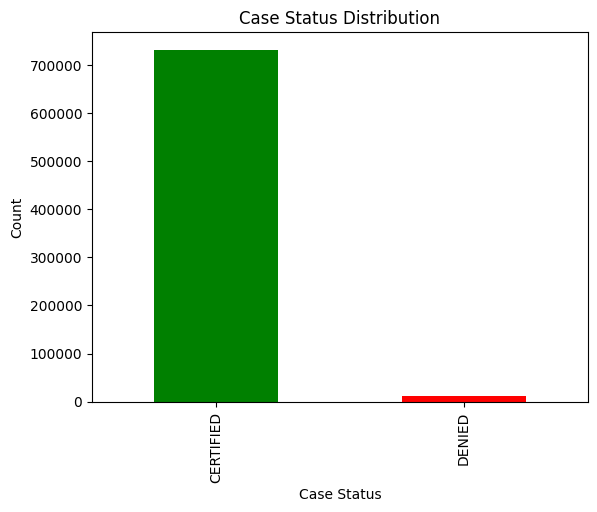

In [72]:
# CASE_STATUS DISTRIBUTION

counts = df['CASE_STATUS'].value_counts()
colors = ['green', 'red']
counts.plot(kind='bar', color=colors[:len(counts)])

plt.title("Case Status Distribution")
plt.xlabel("Case Status")
plt.ylabel("Count")
plt.show()

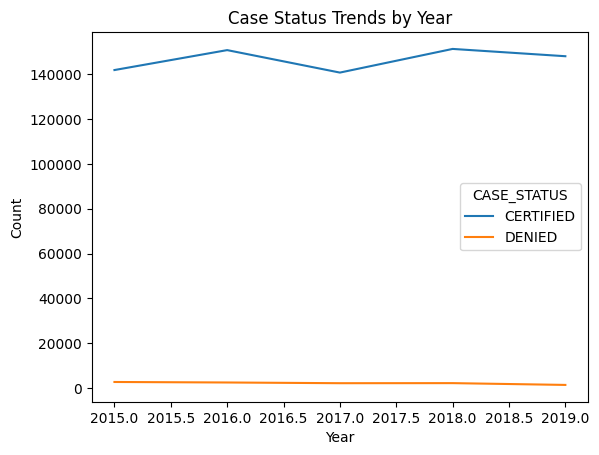

In [73]:
# CASE_STATUS vs YEAR (Trend over time)

df.groupby('YEAR')['CASE_STATUS'].value_counts().unstack().plot()
plt.title("Case Status Trends by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

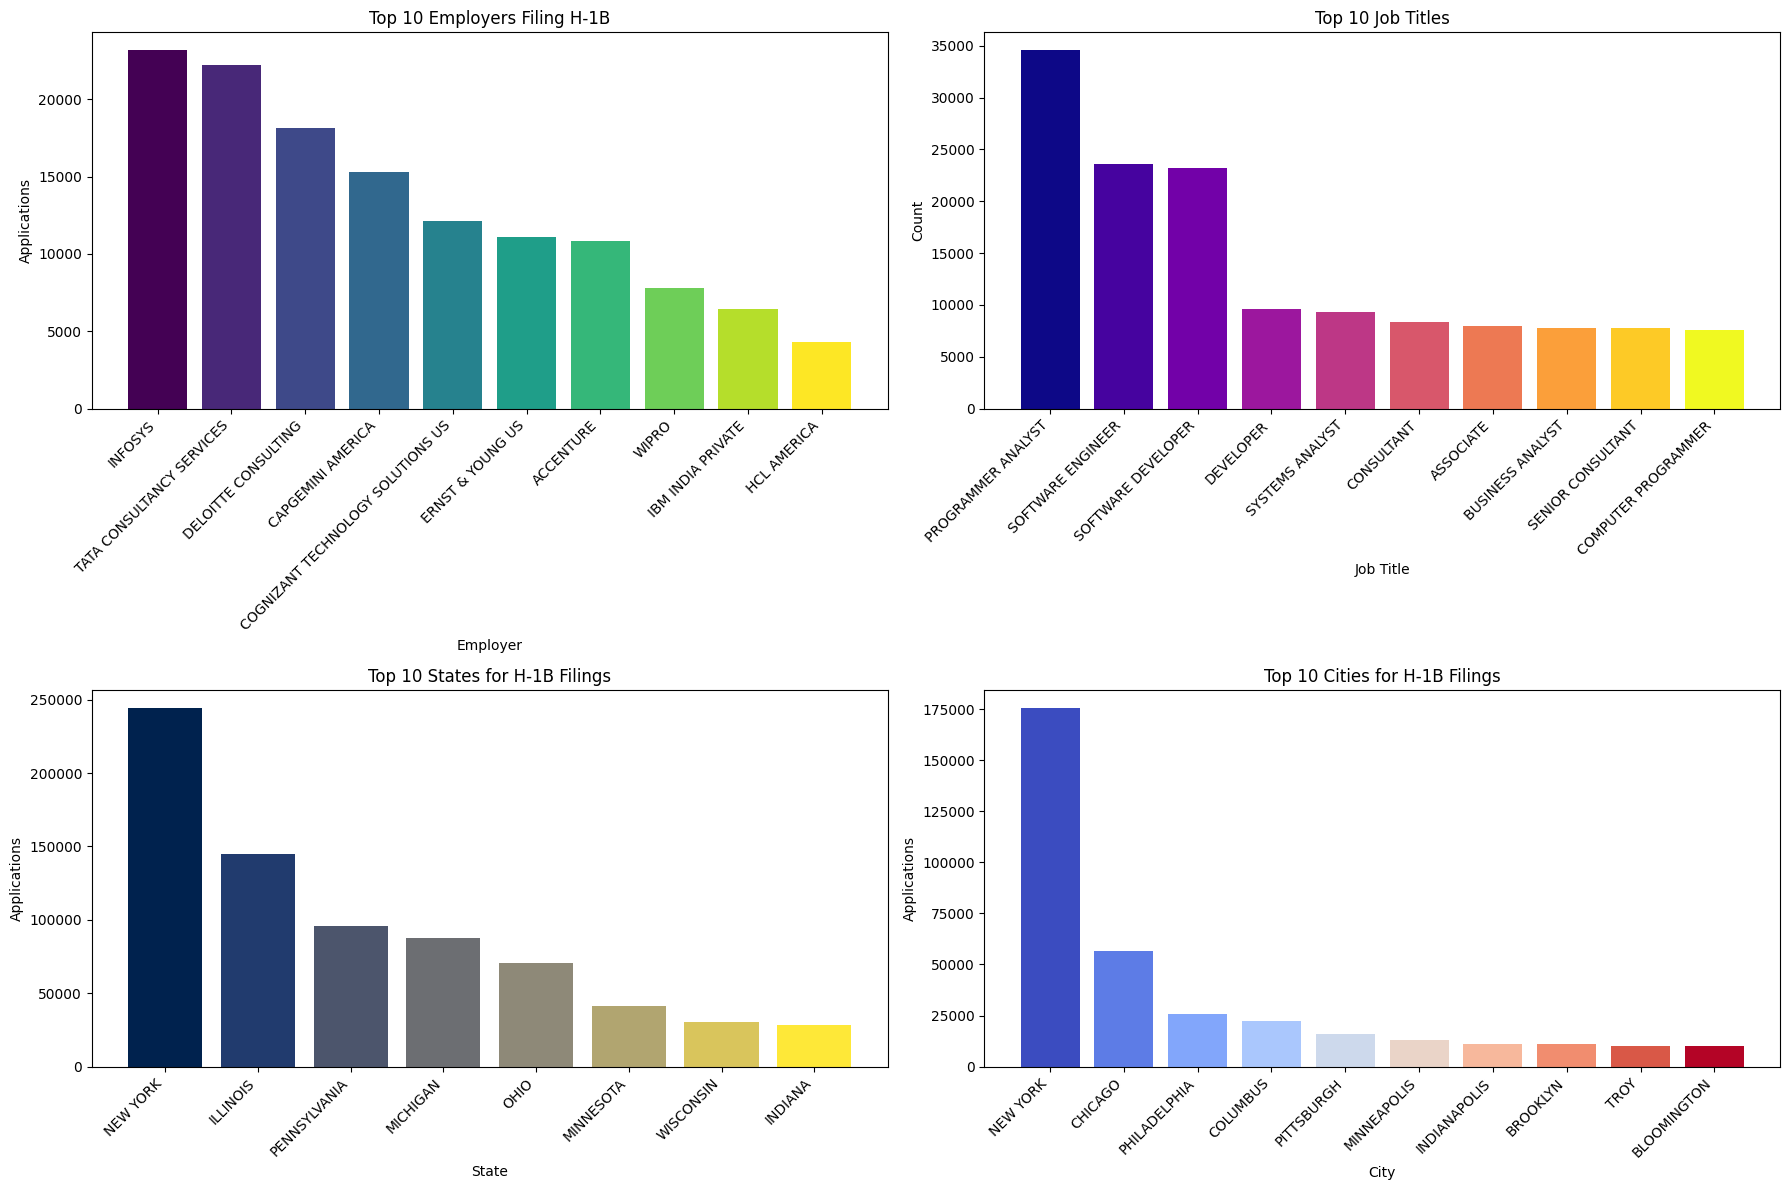

In [74]:
# ----- Prepare Data -----
top_employers = df['EMPLOYER_NAME'].value_counts().head(10)
top_jobs = df['JOB_TITLE'].value_counts().head(10)
top_states = df['STATE'].value_counts().head(10)
top_cities = df['CITY'].value_counts().head(10)

# ----- Create Subplots -----
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
cmap1 = plt.cm.viridis
colors1 = cmap1(np.linspace(0, 1, len(top_employers)))

# 1 → Top Employers
axes[0, 0].bar(top_employers.index, top_employers.values, color = colors1)
axes[0, 0].set_title("Top 10 Employers Filing H-1B")
axes[0, 0].set_xlabel("Employer")
axes[0, 0].set_ylabel("Applications")
axes[0, 0].set_xticks(range(len(top_employers)))
axes[0, 0].set_xticklabels(top_employers.index, rotation=45, ha='right')

cmap2 = plt.cm.plasma
colors2 = cmap2(np.linspace(0, 1, len(top_jobs)))

# 2 → Top Job Titles
axes[0, 1].bar(top_jobs.index, top_jobs.values, color = colors2)
axes[0, 1].set_title("Top 10 Job Titles")
axes[0, 1].set_xlabel("Job Title")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_xticks(range(len(top_jobs)))
axes[0, 1].set_xticklabels(top_jobs.index, rotation=45, ha='right')

cmap3 = plt.cm.cividis
colors3 = cmap3(np.linspace(0, 1, len(top_states)))

# 3 → Top States
axes[1, 0].bar(top_states.index, top_states.values, color = colors3)
axes[1, 0].set_title("Top 10 States for H-1B Filings")
axes[1, 0].set_xlabel("State")
axes[1, 0].set_ylabel("Applications")
axes[1, 0].set_xticks(range(len(top_states)))
axes[1, 0].set_xticklabels(top_states.index, rotation=45, ha='right')

cmap4 = plt.cm.coolwarm
colors4 = cmap4(np.linspace(0, 1, len(top_cities)))

# 4 → Top Cities
axes[1, 1].bar(top_cities.index, top_cities.values, color = colors4)
axes[1, 1].set_title("Top 10 Cities for H-1B Filings")
axes[1, 1].set_xlabel("City")
axes[1, 1].set_ylabel("Applications")
axes[1, 1].set_xticks(range(len(top_cities)))
axes[1, 1].set_xticklabels(top_cities.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

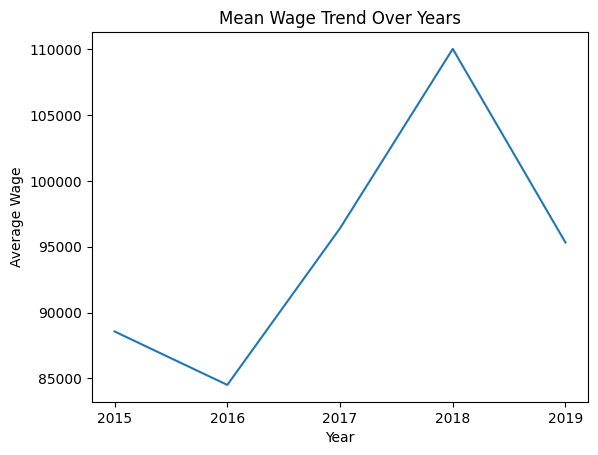

In [75]:
# YEAR vs WAGE (Trend)
df.groupby('YEAR')['PREVAILING_WAGE'].mean().plot(kind='line')
plt.title("Mean Wage Trend Over Years")
plt.xlabel("Year")
year_counts = df['YEAR'].value_counts().sort_index()
plt.xticks(year_counts.index)
plt.ylabel("Average Wage")
plt.show()

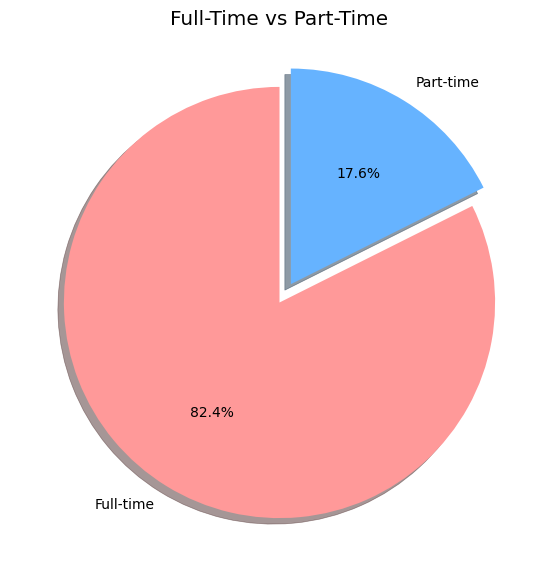

In [76]:
#FULL_TIME_POSITION Pie Chart

# Full-time position counts
fulltime_counts = df['FULL_TIME_POSITION'].value_counts()

#colors
colors = ['#ff9999', '#66b3ff']

# explodes used to explode a portion
explodes = [0, 0.1]

# use ggplot style
plt.style.use('ggplot')

# lables
positions = ['Full-time', 'Part-time']
plt.figure(figsize=(7,7))
plt.pie(fulltime_counts.values,labels = positions,colors= colors,
         explode = explodes, shadow = True, autopct='%1.1f%%', startangle=90)
plt.title("Full-Time vs Part-Time")
plt.show()

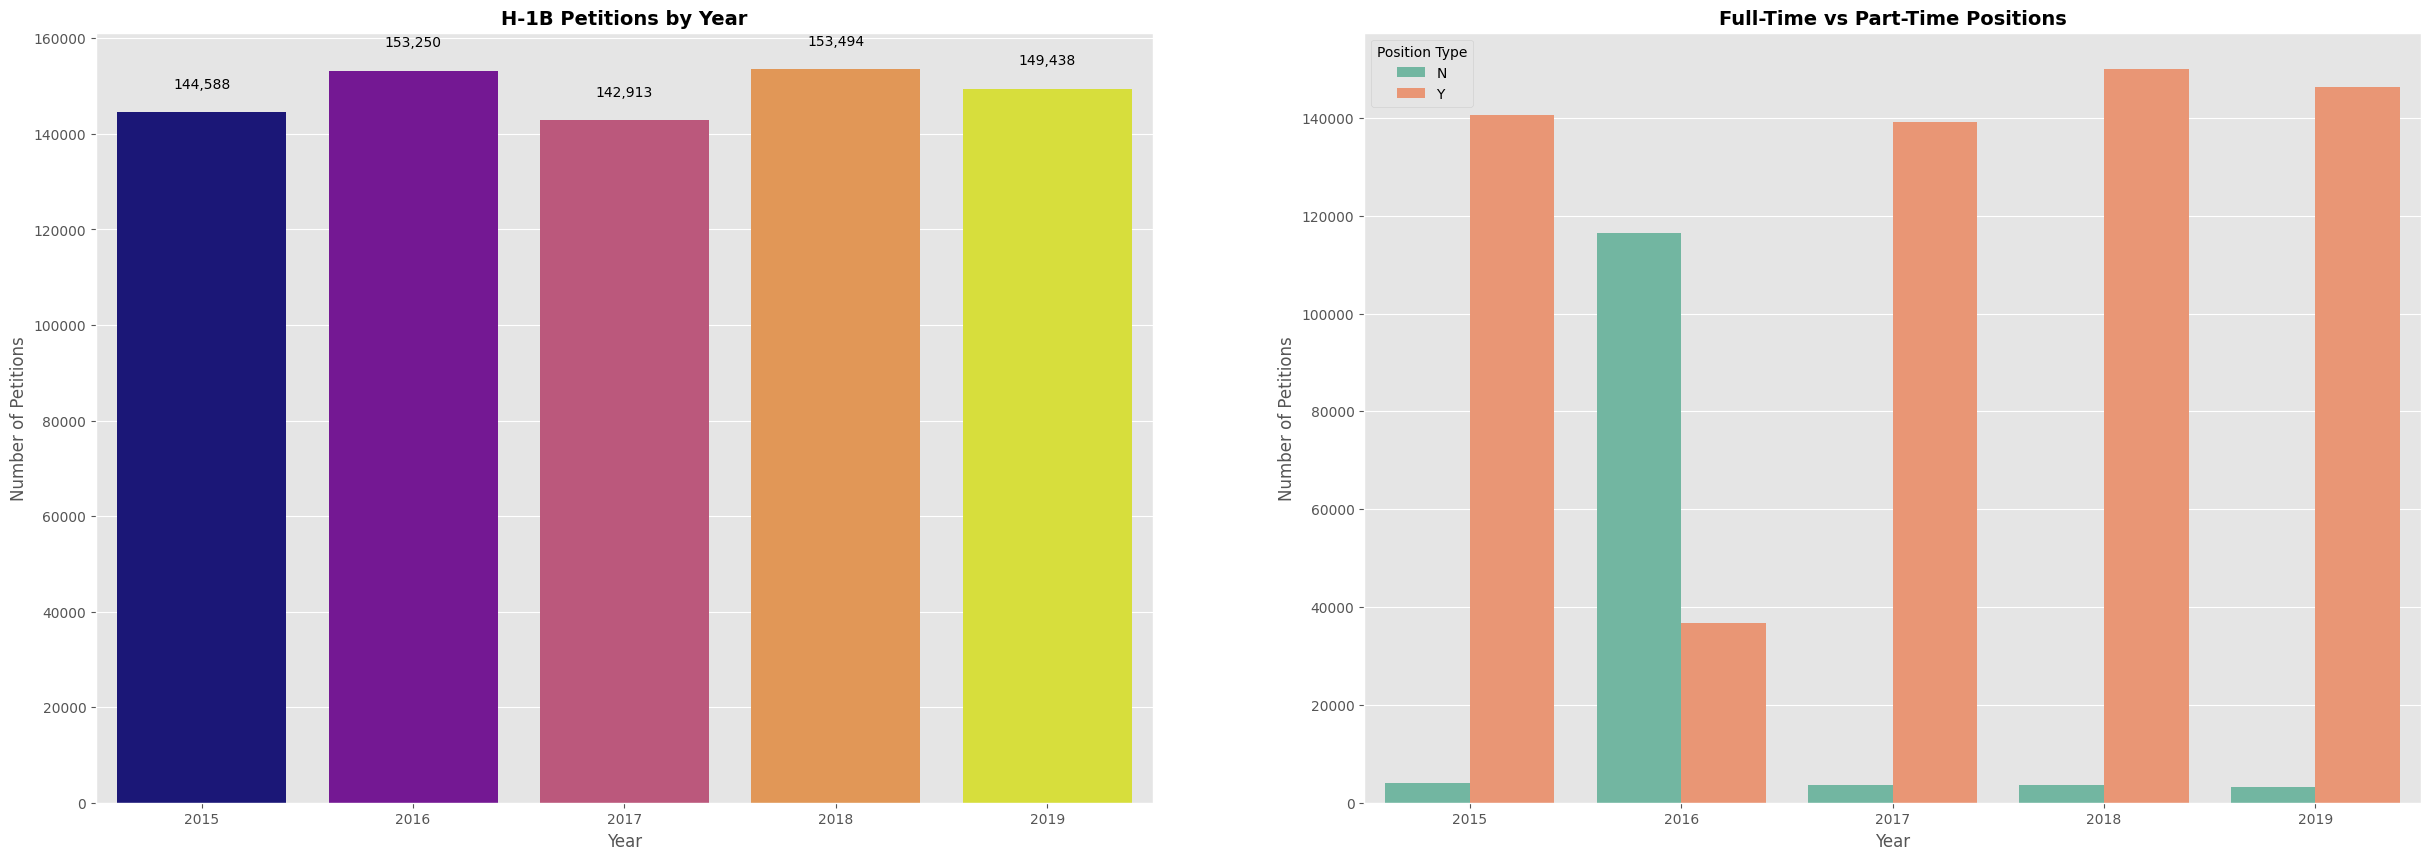

In [77]:
# Yearly trends
plt.figure(figsize=(30, 10))

# Petitions by year
plt.subplot(1, 2, 1)
yearly_counts = df['YEAR'].value_counts().sort_index()
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette='plasma', hue=yearly_counts.index, legend=False)
plt.title('H-1B Petitions by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Petitions')
for i, v in enumerate(yearly_counts.values):
    plt.text(i, v + 5000, f'{v:,}', ha='center')

# Full-time vs Part-time trends
plt.subplot(1, 2, 2)
ft_trends = df.groupby(['YEAR', 'FULL_TIME_POSITION']).size().reset_index(name='count')
sns.barplot(data=ft_trends, x='YEAR', y='count', hue='FULL_TIME_POSITION', palette='Set2')
plt.title('Full-Time vs Part-Time Positions', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Petitions')
plt.legend(title='Position Type')

## EDA(Exploratory Data Analysis)

In [78]:
# check for NA values
df.isna().sum()

CASE_STATUS           0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
CITY                  0
YEAR                  0
STATE                 0
EMPLOYER_NAME         0
SOC_CODE              0
JOB_CLEAN             0
dtype: int64

In [79]:
# check for duplicate values
df.duplicated().sum()

np.int64(253883)

In [80]:
duplicates = df[df.duplicated()]
print(duplicates.head())

   CASE_STATUS                         SOC_NAME  \
7    CERTIFIED        COMPUTER SYSTEMS ANALYSTS   
13   CERTIFIED                   WEB DEVELOPERS   
25   CERTIFIED  COMPUTER OCCUPATIONS, ALL OTHER   
49   CERTIFIED             COMPUTER PROGRAMMERS   
56   CERTIFIED                   WEB DEVELOPERS   

                              JOB_TITLE FULL_TIME_POSITION  PREVAILING_WAGE  \
7                    PROGRAMMER ANALYST                  Y          47431.0   
13             DEVELOPER USER INTERFACE                  Y          54330.0   
25  SOFTWARE QUALITY ASSURANCE ENGINEER                  Y          58032.0   
49                            DEVELOPER                  Y          66082.0   
56             DEVELOPER USER INTERFACE                  Y          47133.0   

           CITY  YEAR         STATE              EMPLOYER_NAME SOC_CODE  \
7       BUFFALO  2015      NEW YORK                      AIMIC  15-1121   
13      MALVERN  2015  PENNSYLVANIA  TATA CONSULTANCY SERVICES  15-1

In [81]:
duplicates = df[df.duplicated(subset=["SOC_CODE"], keep=False)]
print(duplicates.head())

  CASE_STATUS                           SOC_NAME                JOB_TITLE  \
0   CERTIFIED          COMPUTER SYSTEMS ANALYSTS  SENIOR BUSINESS ANALYST   
1   CERTIFIED  SOFTWARE DEVELOPERS, APPLICATIONS   SR. SOFTWARE DEVELOPER   
2   CERTIFIED             FILM AND VIDEO EDITORS             VIDEO EDITOR   
3   CERTIFIED               COMPUTER PROGRAMMERS       PROGRAMMER ANALYST   
4   CERTIFIED                 FINANCIAL ANALYSTS        FINANCIAL ANALYST   

  FULL_TIME_POSITION  PREVAILING_WAGE         CITY  YEAR         STATE  \
0                  Y         109116.8  NORTH WALES  2015  PENNSYLVANIA   
1                  Y          84906.0      CHICAGO  2015      ILLINOIS   
2                  Y          39333.0       AUBURN  2015      NEW YORK   
3                  Y          61901.0         TROY  2015      MICHIGAN   
4                  N          49108.8   CARBONDALE  2015      ILLINOIS   

                      EMPLOYER_NAME SOC_CODE                JOB_CLEAN  
0                   

In [82]:
df = df.drop_duplicates()

In [83]:
df.shape

(489800, 11)

In [84]:
df['CASE_STATUS'].value_counts()

CASE_STATUS
CERTIFIED    479886
DENIED         9914
Name: count, dtype: int64

In [85]:
df["JOB_TITLE"] = df["JOB_CLEAN"]
df.drop(columns=["JOB_CLEAN"], inplace=True)
df.rename(columns={"JOB_CLEAN": "JOB_TITLE"}, inplace=True)


In [86]:
df.columns

Index(['CASE_STATUS', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'CITY', 'YEAR', 'STATE', 'EMPLOYER_NAME',
       'SOC_CODE'],
      dtype='object')

In [87]:
df = df.drop("SOC_NAME", axis=1)

In [88]:
df.head()

,CASE_STATUS,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,CITY,YEAR,STATE,EMPLOYER_NAME,SOC_CODE
0,CERTIFIED,SENIOR BUSINESS ANALYST,Y,109116.8,NORTH WALES,2015,PENNSYLVANIA,IT CATS,15-1121
1,CERTIFIED,SR SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,2015,ILLINOIS,ISR INFO WAY,15-1132
2,CERTIFIED,VIDEO EDITOR,Y,39333.0,AUBURN,2015,NEW YORK,MAGIC CIRCLE FILMS INTERNATIONAL,27-4032
3,CERTIFIED,PROGRAMMER ANALYST,Y,61901.0,TROY,2015,MICHIGAN,SUNERA TECHNOLOGIES,15-1131
4,CERTIFIED,FINANCIAL ANALYST,N,49108.8,CARBONDALE,2015,ILLINOIS,LIANG,13-2051


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489800 entries, 0 to 743749
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CASE_STATUS         489800 non-null  object 
 1   JOB_TITLE           489800 non-null  object 
 2   FULL_TIME_POSITION  489800 non-null  object 
 3   PREVAILING_WAGE     489800 non-null  float64
 4   CITY                489800 non-null  object 
 5   YEAR                489800 non-null  int64  
 6   STATE               489800 non-null  object 
 7   EMPLOYER_NAME       489800 non-null  object 
 8   SOC_CODE            489800 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 37.4+ MB


In [90]:
# df.to_csv("H1b_processed_dataset.csv")

In [91]:
df.head()

,CASE_STATUS,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,CITY,YEAR,STATE,EMPLOYER_NAME,SOC_CODE
0,CERTIFIED,SENIOR BUSINESS ANALYST,Y,109116.8,NORTH WALES,2015,PENNSYLVANIA,IT CATS,15-1121
1,CERTIFIED,SR SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,2015,ILLINOIS,ISR INFO WAY,15-1132
2,CERTIFIED,VIDEO EDITOR,Y,39333.0,AUBURN,2015,NEW YORK,MAGIC CIRCLE FILMS INTERNATIONAL,27-4032
3,CERTIFIED,PROGRAMMER ANALYST,Y,61901.0,TROY,2015,MICHIGAN,SUNERA TECHNOLOGIES,15-1131
4,CERTIFIED,FINANCIAL ANALYST,N,49108.8,CARBONDALE,2015,ILLINOIS,LIANG,13-2051
